In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np

In [7]:
def load_and_clean_data(file_path):
    """
    Loads data from a CSV file and performs common cleaning operations.
    
    Args:
        file_path (str): The path to the data file (e.g., 'data.csv').
    
    Returns:
        pd.DataFrame: A cleaned Pandas DataFrame.
    """
    
    print(f"--- 1. Loading Data from: {file_path} ---")
    
    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None

    #2. Initial Data Inspection
    print("\n--- Initial Inspection (First 5 Rows) ---")
    print(df.head())
    
    print("\n--- Data Information (Data Types and Missing Values) ---")
    df.info()

    # --- 3. Cleaning Steps ---
    
    #  Handling Duplicates
    initial_rows = len(df)
    df.drop_duplicates(inplace=True)
    rows_dropped = initial_rows - len(df)
    print(f"\n--- Cleaning: Duplicates ---")
    print(f"Dropped {rows_dropped} duplicate rows.")

    # Standardizing Column Names 
    # Converts names like 'Product ID' to 'product_id'
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    print("\n--- Cleaning: Column Names ---")
    print(f"New Columns: {list(df.columns)}")
    
    #  Handling Missing Values (Nulls/NaNs)
    print("\n--- Cleaning: Missing Values ---")
    
    # Check for columns with missing data
    missing_counts = df.isnull().sum()
    missing_cols = missing_counts[missing_counts > 0]
    
    if not missing_cols.empty:
        print("Missing values found in the following columns:")
        print(missing_cols)
        
       
        
        #  Fill missing values
        for col in missing_cols.index:
            # If the column is numeric, fill with the mean/median
            if pd.api.types.is_numeric_dtype(df[col]):
                median_val = df[col].median()
                df[col].fillna(median_val, inplace=True)
                print(f"- Filled missing values in '{col}' with the median ({median_val}).")
            
            # If the column is categorical, fill with the most frequenT
            elif pd.api.types.is_object_dtype(df[col]):
                df[col].fillna('UNKNOWN', inplace=True)
                print(f"- Filled missing values in '{col}' with 'UNKNOWN'.")
    else:
        print("No missing values found.")

    

    print("\n--- Final Cleaned Data Info ---")
    df.info()
    
    return df




dummy_data = {
    'Transaction ID': [1, 2, 3, 4, 5, 1],
    'Item Category': ['Food', 'Tech', 'Food', np.nan, 'Tech', 'Food'],
    'Price': [10.5, 99.9, np.nan, 5.0, 150.0, 10.5],
    'Quantity': [1, 2, 1, 3, 1, 1]
}
dummy_df = pd.DataFrame(dummy_data)
dummy_df.to_csv('sales_data.csv', index=False)

# Call the function with your file path
cleaned_data = load_and_clean_data('sales_data.csv')

if cleaned_data is not None:
    print("\n✅ Data Cleaning Complete. Ready for Analysis!")
    

--- 1. Loading Data from: sales_data.csv ---

--- Initial Inspection (First 5 Rows) ---
   Transaction ID Item Category  Price  Quantity
0               1          Food   10.5         1
1               2          Tech   99.9         2
2               3          Food    NaN         1
3               4           NaN    5.0         3
4               5          Tech  150.0         1

--- Data Information (Data Types and Missing Values) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  6 non-null      int64  
 1   Item Category   5 non-null      object 
 2   Price           5 non-null      float64
 3   Quantity        6 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 324.0+ bytes

--- Cleaning: Duplicates ---
Dropped 1 duplicate rows.

--- Cleaning: Column Names ---
New Columns: ['transaction_id', 'it

C:\Users\deepika\AppData\Local\Temp\ipykernel_36756\2114133987.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('UNKNOWN', inplace=True)
C:\Users\deepika\AppData\Local\Temp\ipykernel_36756\2114133987.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


--- Starting Exploratory Data Analysis (EDA) ---

--- 1. Descriptive Statistics ---
       transaction_id       price  quantity
count        5.000000    5.000000  5.000000
mean         3.000000   64.120000  1.600000
std          1.581139   61.452071  0.894427
min          1.000000    5.000000  1.000000
25%          2.000000   10.500000  1.000000
50%          3.000000   55.200000  1.000000
75%          4.000000   99.900000  2.000000
max          5.000000  150.000000  3.000000

--- 2. Value Counts for Categorical Columns ---

Value Counts for 'item_category':
item_category
Food       2
Tech       2
UNKNOWN    1
Name: count, dtype: int64


C:\Users\deepika\AppData\Local\Temp\ipykernel_36756\2527331999.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='item_category', data=cleaned_data, ax=axes[1], palette='viridis')


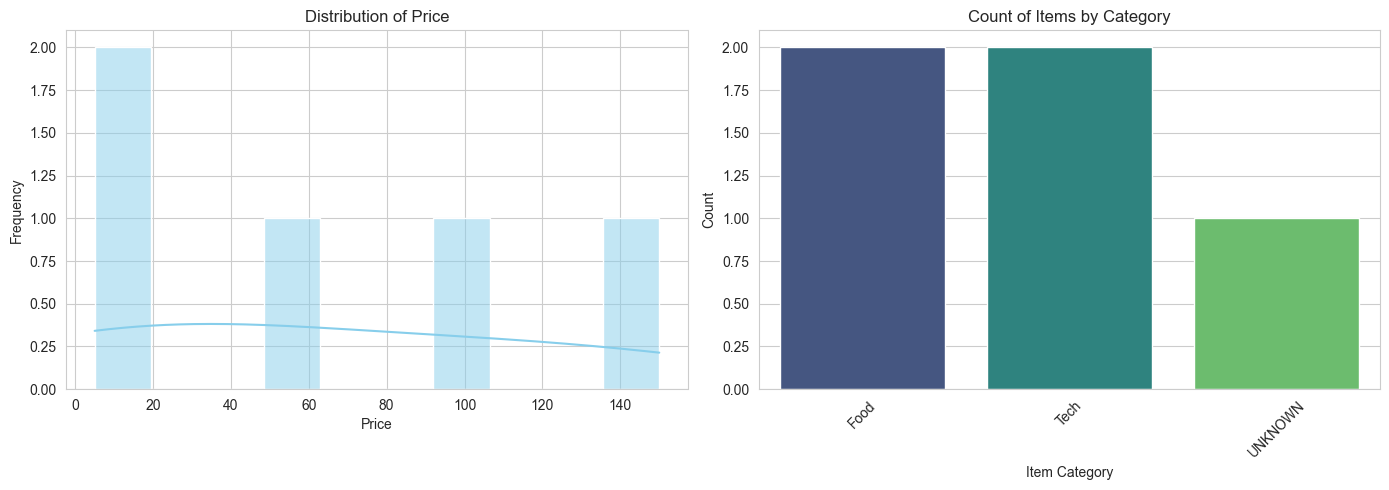


✅ EDA Complete. 


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



if 'cleaned_data' not in locals() or cleaned_data is None:
    print("Error: Please make sure 'cleaned_data' DataFrame is defined and loaded.")
else:
    print("--- Starting Exploratory Data Analysis (EDA) ---")

    
    # 1. Descriptive Statistics (Numerical Columns)

    
    print("\n--- 1. Descriptive Statistics ---")
    # Provides count, mean, std, min, max, and quartiles for numeric columns
    print(cleaned_data.describe())

    
    # 2. Value Counts (Categorical Columns)
    

    print("\n--- 2. Value Counts for Categorical Columns ---")
    
    # Iterate through object (string/categorical) columns
    for col in cleaned_data.select_dtypes(include='object').columns:
        print(f"\nValue Counts for '{col}':")
        # Shows the frequency of each unique value in the column
        print(cleaned_data[col].value_counts())

    
    # 3. Data Visualization (Histograms and Bar Plots)
    

    # Set visualization style
    sns.set_style("whitegrid")
    
    # Create figures for visualizations
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    
    
   
    if 'price' in cleaned_data.columns and pd.api.types.is_numeric_dtype(cleaned_data['price']):
        sns.histplot(cleaned_data['price'], bins=10, kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title('Distribution of Price')
        axes[0].set_xlabel('Price')
        axes[0].set_ylabel('Frequency')
    else:
        axes[0].text(0.5, 0.5, "Price column not found or not numeric.", 
                     horizontalalignment='center', verticalalignment='center')


    # --- Visualization B: Categorical Variable Counts ---
    
    
    if 'item_category' in cleaned_data.columns and pd.api.types.is_object_dtype(cleaned_data['item_category']):
        sns.countplot(x='item_category', data=cleaned_data, ax=axes[1], palette='viridis')
        axes[1].set_title('Count of Items by Category')
        axes[1].set_xlabel('Item Category')
        axes[1].set_ylabel('Count')
        axes[1].tick_params(axis='x', rotation=45)
    else:
        axes[1].text(0.5, 0.5, "Item Category column not found or not categorical.", 
                     horizontalalignment='center', verticalalignment='center')

    plt.tight_layout()
    plt.show()

    print("\n✅ EDA Complete. ")

In [12]:
pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   - -------------------------------------- 1.3/39.0 MB 9.2 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/39.0 MB 9.8 MB/s eta 0:00:04
   ----- ---------------------------------- 5.5/39.0 MB 10.1 MB/s eta 0:00:04
   ------ --------------------------------- 6.8/39.0 MB 9.0 MB/s eta 0:00:04
   ------- -------------------------------- 7.3/39.0 MB 8.9 MB/s eta 0:00:04
   -------- ------------------------------- 7.9/39.0 MB 6.9 MB/s eta 0:00:05
   --------- ------------------------------ 9.4/39.0 MB 6.8 MB/s eta 0:00:05
   ----------- ---------------------------- 11.0/39.0 MB 7.0 MB/s eta 0:00:05
   ------------- -------------------------- 12.8/39.0 MB 7.1 MB/s eta 0:00:04
   -------------- ------------------------- 14.4/39.0 MB 7.2 MB/s eta 0:00:04
   ---------------- ----------------------- 16.3/39.0 MB 7.4 MB/s eta 0:00:04
   ------------------ --------------------- 17.6/39.0 MB 7.4 MB/s eta 0:00:03


  You can safely remove it manually.
  You can safely remove it manually.


In [13]:
import cv2
import numpy as np
from PIL import Image

def preprocess_image(image_path):
    # 1. Load image
    img = cv2.imread(image_path)
    # 2. Convert to RGB (standard for many models)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # 3. Resize to a standard input size (e.g., 224x224 for a model)
    resized_img = cv2.resize(img_rgb, (224, 224))
    # 4. Normalize pixel values (0 to 1)
    normalized_img = resized_img / 255.0
    return normalized_img

In [22]:
def compose_final_outfit(top_items_df):
    # This model is trained to know that 'jeans' go with 't-shirts' and 'sneakers'
    
    # 1. Find the best T-Shirt (Top of the 'T-shirt' category)
    top_tshirt = top_items_df[top_items_df['category'] == 'T-shirt'].iloc[0]
    
    # 2. Find the best bottom-wear that complements the top's color/style
    # This involves a complex sub-score for inter-garment compatibility
    best_jeans = top_items_df[(top_items_df['category'] == 'Jeans') & 
                              (top_items_df['color'] != top_tshirt['color'])].iloc[0]
    
    # 3. Find the best footwear that complements the style
    best_sneakers = top_items_df[top_items_df['category'] == 'Sneaker'].iloc[0]
    
    return [top_tshirt, best_jeans, best_sneakers]

In [23]:
# In a real application, this calls a robust, dedicated service/API
# This is a highly specialized and computationally expensive step.

def virtual_try_on(user_image_path, outfit_details):
    # 1. Get Garment Image Data: Load high-resolution images of the selected clothes.
    garment_images = [item['image_path'] for item in outfit_details]
    
    # 2. Feed into the GAN/Diffusion Model
    # The model takes the: (User Image, User Pose Vector, Garment Images)
    # The output is a new image where the garment seamlessly replaces the clothes on the user.
    
    # Simulating the output image
    try_on_image = "path/to/generated/outfit_on_user.jpg"
    
    return try_on_image

In [24]:
def deliver_and_log_result(generated_image_path, final_outfit):
    print("--- Your Personalized Outfit ---")
    print(f"Generated Image: {generated_image_path}") # Display the image
    print("\nRecommended Items:")
    for item in final_outfit:
        print(f"- {item['name']} by {item['brand']} (Score: {item['recommendation_score']:.2f})")
    
    # Logging the interaction for the Data Analyst/Scientist
    user_feedback = input("Did you like this outfit? (Y/N/Refine): ")
    
    # Save the result of the interaction
    log_data = {
        'user_id': 'Muthu_Janaki', # Example use of stored context
        'session_id': 'S123',
        'input_style': 'Casual',
        'recommended_item_ids': [item['id'] for item in final_outfit],
        'user_action': user_feedback, # Crucial feedback signal
        'timestamp': pd.Timestamp.now()
    }
    # Append log_data to a PostgreSQL/NoSQL database for analysis and model training
    # logging_service.save(log_data)
    
    if user_feedback.lower() == 'refine':
        # Start the process again with a new constraint
        print("Let's refine the look! What would you like to change?")
        # This triggers a new iteration in the conversational flow